<a id = "top"></a>


# Project:  TMDB MOVIES ANALYSIS 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id = "intro"></a>
## Introduction

### Dataset Description 
This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.



### Questions for Analysis
<ul>
<li> <a href = "#que1"> Does a higher budget translate to a higher revenue ? </a></li>   Do movies with a large budget generally generate more revenue than those with less? The general idea would be that since they have enough to spend to bring all their creative ideas to life ,then they would be able to generate something substantial. A dive into the dataset will help answer this.
<li> <a href = "#que2"> Does a longer Runtime mean a bigger Budget? </li>
        Does a longer runtime inflate the budget or does it leave it unchanged? </a>
<li> <a href = "#que3"> How much more profitable has the industry grown over the years? </a></li>
           What has the trend been over the years? positive?, negative? or static? 
<li> <a href = "#que4"> He's your Director? Then it's a blockbuster!  </a></li>
       The top director whose work is a guaranteed hit 
<li> <a href = '#top genre'> Top Genre </a></li>
            </ul>

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline 

<a id = "wrangling"></a>
## Data Wrangling 

In [2]:
df = pd.read_csv('tmdb-movies.csv')

In [3]:
df.head(2)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08


In [4]:
print(f'There are {df.shape[0]} rows and {df.shape[1]} columns')

There are 10866 rows and 21 columns


In [5]:
df.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

Some of the columns listed above will be irrelevant to the analysis ,and so,will be dropped.

In [6]:
for i,each in enumerate(df.columns):
    print (i,each)

0 id
1 imdb_id
2 popularity
3 budget
4 revenue
5 original_title
6 cast
7 homepage
8 director
9 tagline
10 keywords
11 overview
12 runtime
13 genres
14 production_companies
15 release_date
16 vote_count
17 vote_average
18 release_year
19 budget_adj
20 revenue_adj


created a for loop to assign a number to each of the columns so as to use the numpy function __np.r___ to select multiple ranges of values to easily drop irrelevant columns

In [7]:
df = df.iloc[:,np.r_[2:7,8,12:21]]

In [8]:
df.columns

Index(['popularity', 'budget', 'revenue', 'original_title', 'cast', 'director',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

In [9]:
df.head()

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [10]:
df.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


From this we can surmise that the timeline for the dataset ranges between 1960 to 2015. Also, there are some incorrect inputs that will be dropped, as we can see that the minimum value for the runtime,budget, revenue,and the two _adj columns is **0**, this is irregular and will be addressed in the data cleaning phase. The budget and revenue(___adj inclusive__) will be recomputed into a smaller measure to ensure better understanding.

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   popularity            10866 non-null  float64
 1   budget                10866 non-null  int64  
 2   revenue               10866 non-null  int64  
 3   original_title        10866 non-null  object 
 4   cast                  10790 non-null  object 
 5   director              10822 non-null  object 
 6   runtime               10866 non-null  int64  
 7   genres                10843 non-null  object 
 8   production_companies  9836 non-null   object 
 9   release_date          10866 non-null  object 
 10  vote_count            10866 non-null  int64  
 11  vote_average          10866 non-null  float64
 12  release_year          10866 non-null  int64  
 13  budget_adj            10866 non-null  float64
 14  revenue_adj           10866 non-null  float64
dtypes: float64(4), int6

Issues of missing values and incorrect datatypes have been detected and will be addressed in the data cleaning phase.


### Data Cleaning
> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).
 

In [12]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.

In [13]:
df['release_date'] = pd.to_datetime(df.release_date)

Here the release_date and release_year columns have been converted to datetime objects.

In [14]:
df.query('runtime == 0').shape[0]

31

There are just 31 **0** values in the runtime column, and so, I'll simply replace them with the mean of the runtime column.

In [15]:
df.runtime.replace(0,df.runtime.mean(),inplace = True)

In [16]:
df.query('budget == 0').shape[0]

5696

In [17]:
df.query('revenue == 0').shape[0]

6016

More than half the dataset has 0 values for either the budget or revenue column. My strategy to tackle this is to:
* Replace all zero values with **nan** so as to be able to ise the dropna with the thresh argument to:
    * Delete all rows with both the budget and revenue missing. 
    * Replace all **nan** values in the remaining rows with the mean of it's column.

In [18]:
df.replace(0,np.nan,inplace = True)

In [19]:
df.dropna(thresh = 13,inplace = True)

In [20]:
df.revenue.fillna(df.revenue.mean(),inplace = True)
df.budget.fillna(df.budget.mean(),inplace = True)
df.budget_adj.fillna(df.budget_adj.mean(),inplace = True) 
df.revenue_adj.fillna(df.revenue_adj.mean(),inplace = True)

In [21]:
df.duplicated().sum()

1

In [22]:
df.drop_duplicates(inplace = True)

To ensure that all columns are error free, I'll perform one last check using a histogram. 

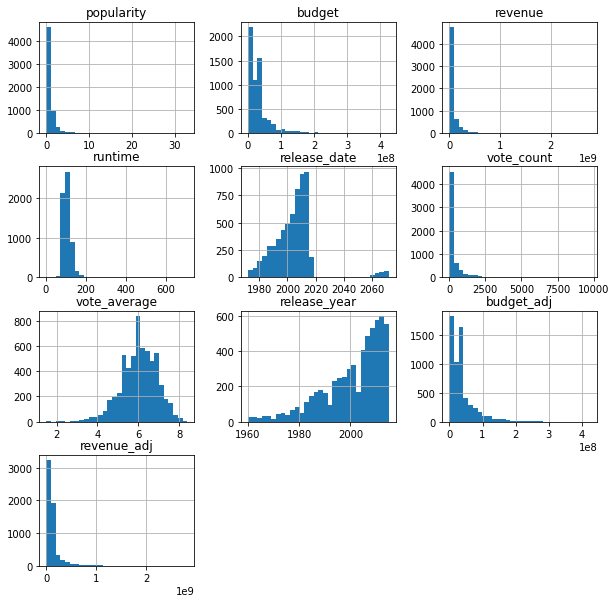

In [23]:
df.hist(bins = 30, figsize = (10,10));

At this stage all I'll say is "Thank you visualization". The **release_date** column has a problem as it seems to have **time travelled**. There are films with a release date in **2060!!**. To solve this I'll use the values in the **release_year** column to replace the extreme values in the **release_date** column.

In [24]:
df[['y','m','d']] = df.release_date.astype(str).str.split('-',expand = True)

Here, i split the **release_date** column into the year,month and date components in order to compare the year with the **release_year** column. 

In [25]:
df['diff'] = (df.y.astype(int) - df.release_year)

In the code above, i create a new column **diff** to compute the difference between the year extracted from the **release_date** and the **release_year** column. 

In [26]:
df.query('diff != 0')['diff'].describe()

count    174.0
mean     100.0
std        0.0
min      100.0
25%      100.0
50%      100.0
75%      100.0
max      100.0
Name: diff, dtype: float64

With the **describe()** method,i can confirm that there are 174 columns with incorrect entries and that they all follow a regular pattern.

In [27]:
df['new'] = df.release_year.astype(str) + '/' + df.m + '/' + df.d

Concatenating the **release_year** with the date and month components extracted from the **release_date** column, in a new column **new**

In [28]:
df.new = pd.to_datetime(df.new)
df['release_date'] = df.new

The **new** column is converted to a datetime object, and reassigned to the **release_date** column. 

In [29]:
df.drop(columns= ['m','y','d','new','release_year','diff'],inplace = True)

All columns created to correct the error are dropped.

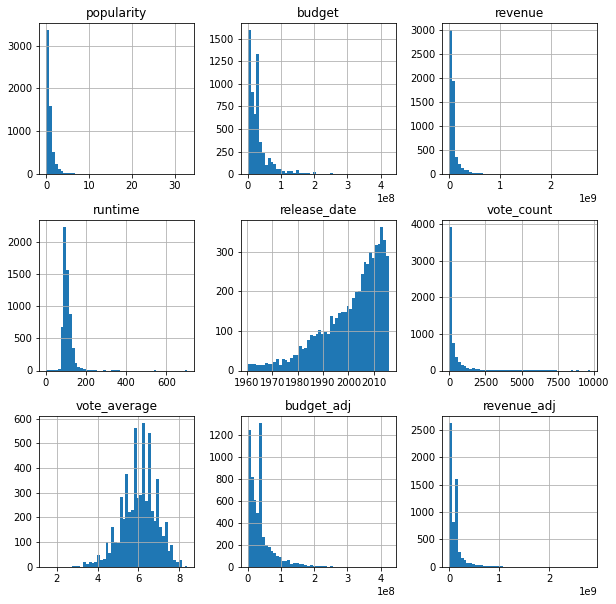

In [30]:
df.hist(bins = 50 ,figsize = (10,10));

<a id = 'eda'></a>
## Exploratory Data Analysis

<a id = "que1"></a>
### Que 1: Does a higher budget translate to higher revenue?

One would presume that a movie with a large budget would yield high revenue. While this could be true, we explore the dataset to find answers. 

In [31]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.


In [32]:
budget_mean = df.budget.mean()

The mean of the **budget** column is simply calculated. 

In [33]:
low_budget_mean_rev = df.query(f'budget < {budget_mean}')['revenue'].mean()
high_budget_mean_rev = df.query(f'budget >=  {budget_mean}')['revenue'].mean()

I have created a mask to extract rows from the dataset that's greater than or equal to the mean budget and another for rows with the budget less than the mean budget. And then, the revenue column is selected and the mean is calculated using the **.mean()** method. 

In [34]:
def labels(x,y,t):
    plt.xlabel(x)
    plt.ylabel(y)
    plt.title(t)

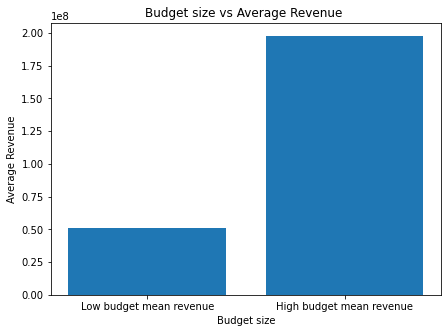

In [35]:
location= [1,2] 
heights = [low_budget_mean_rev,high_budget_mean_rev]
lab = ['Low budget mean revenue', 'High budget mean revenue']
plt.figure(figsize = (7,5))
plt.bar(x = location, height = heights, tick_label= lab)
labels('Budget size','Average Revenue','Budget size vs Average Revenue '); 

Visually represented on a barplot, we see that there is a significant level of disparity between both budget levels revenue. High budget movies have a higher average revenue than the low budget movies.  

/data/user/0/ru.iiec.pydroid3/files/arm-linux-androideabi/lib/python3.9/site-packages/matplotlib/bezier.py:216: RuntimeWarning: divide by zero encountered in power
  return (np.power.outer(1 - t, self._orders[::-1])
/data/user/0/ru.iiec.pydroid3/files/arm-linux-androideabi/lib/python3.9/site-packages/matplotlib/bezier.py:217: RuntimeWarning: divide by zero encountered in power
  * np.power.outer(t, self._orders)) @ self._px


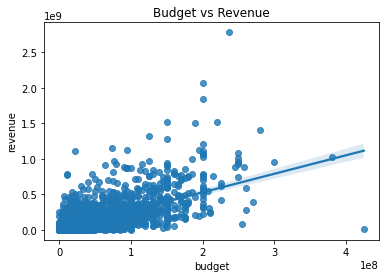

In [59]:
sns.regplot(x = df.budget , y = df.revenue)
plt.title('Budget vs Revenue');

The regression plot gives us a clearer picture on the individual pair comparism between the budget and revenue. Definitely positive, is the relationship between the budget and revenue.

In [37]:
budget_revenue_corr = df.budget.corr(df.revenue).round(2)
budget_revenue_corr 

0.64

The **budget_revenue_corr** takes the visualization a step further by giving us a value to quantify the strength of the relationship between Revenue and Budget. 0.64 can be interpreted as a positive,moderate relationship. Which means that a higher Budget does translate to, on an average, higher revenue, but how much of that higher revenue is explained by a higher budget?

In [38]:
budget_revenue_cod = ((budget_revenue_corr ** 2) * 100).round(2)
budget_revenue_cod

40.96

The **budget_revenue_cod** represents the coefficient of determination (r²). To interprete, On an average, 40.96 precent of the variation in the revenue is as a result of a change in the budget. And since the relationship between the two entities is purely positive, we can conclude that while on an average a high budget translate to a high revenue, less than half of that relationship is as a result of the budget.

<a id = "que2"></a>
### Question 2: Does a longer runtime mean a bigger budget?

<AxesSubplot:>

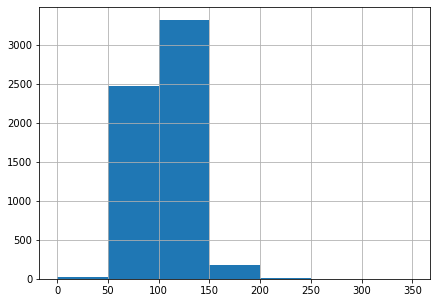

In [39]:
df.runtime.hist(bins = np.arange(0,400,50), figsize = (7,5))

There is little variations in the runtime column, as most of the observation falls within the 50 - 150 range. 

/data/user/0/ru.iiec.pydroid3/files/arm-linux-androideabi/lib/python3.9/site-packages/matplotlib/bezier.py:216: RuntimeWarning: divide by zero encountered in power
  return (np.power.outer(1 - t, self._orders[::-1])
/data/user/0/ru.iiec.pydroid3/files/arm-linux-androideabi/lib/python3.9/site-packages/matplotlib/bezier.py:217: RuntimeWarning: divide by zero encountered in power
  * np.power.outer(t, self._orders)) @ self._px


<Figure size 504x360 with 0 Axes>

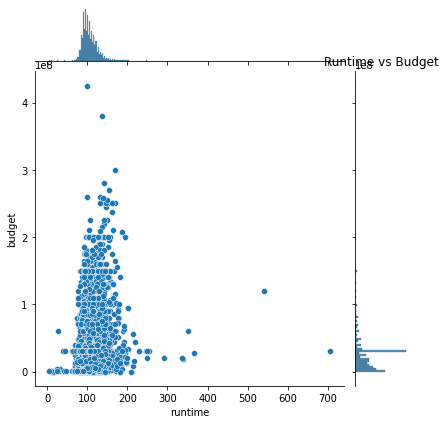

In [40]:
plt.figure(figsize = (7,5))
sns.jointplot(x = 'runtime', y = 'budget' , data = df)
plt.title('Runtime vs Budget');

There is no prominent relationship between the runtime and budget.

In [41]:
df.runtime.corr(df.budget).round(2)

0.24

The correlation coefficient of 0.24 confirms that there is next to no relationship between the two columns. We therfore can conclude that the length of the runtime does not influence the size of the budget. 

<a id = "que3"></a>
### Question 3: How much more profitable has the industry grown over the years?

In [42]:
date_df = df.groupby(df.release_date.dt.year)['revenue'].sum()
date_df = date_df.sort_values(ascending= False)

Using the groupby method, i have created the sum of revenue in each year in the dataset, sliced out the **revenue** column and sorted in descending order.

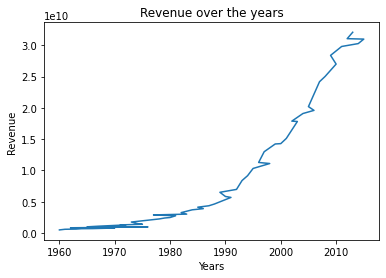

In [43]:
date_df.plot()
labels(t = 'Revenue over the years',y='Revenue',x ='Years');

Plotting a line chart with the data, we can see that there has been a steady rise in profitability in the industry. Safe to say the industry is booming and can be a viable option for investment.

In [44]:
date_mean_df = df.groupby(df.release_date.dt.year)['revenue'].mean()
date_mean_df = date_mean_df.sort_values(ascending= False).head(20)
date_mean_df = date_mean_df.reset_index().sort_values('release_date')

In [45]:
date_mean_df['release_date'] = date_mean_df.release_date.astype(str)

To corroborate our findings, we use the summary statistic (mean). Ive computed the mean for each year in the dataset, sliced out the **revenue** column and sorted in descending order, reset the index and sorted again based on the **release_date** column and then converted the **release_date** back to a str datatype to enable me plot.

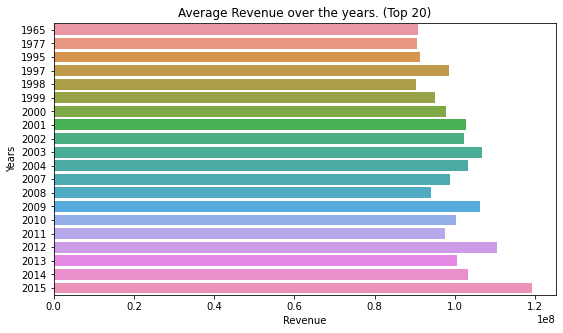

In [46]:
plt.figure(figsize = (9,5))
sns.barplot(x = 'revenue', y = 'release_date' ,data = date_mean_df)
labels(t = 'Average Revenue over the years. (Top 20)',x = 'Revenue',y = 'Years');

The horizontal barchart just as well says the same thing. Though there has been some fluctuations over the years, the general trend is still positive growth.

<a id = "que4"></a>
### Question 4: He's your director? Then it's a blockbuster!

In [47]:
df_copy = df.copy()
df_copy['profit'] = df_copy.revenue - df_copy.budget

A copy of the dataset was created and a new column **profit** was computed _(revenue - budget)_.

In [48]:
dir_df = df_copy.sort_values('profit', ascending= False).head(100)
dir_df = dir_df['director'].value_counts()
dir_df = dir_df[dir_df>1]
dir_df = dir_df.reset_index().rename(columns ={'index':'director','director':'count'})

To get the count of unique **Directors** name in the top 100 most profitable movies, I've sorted by the **profit** column in descending order,sliced the top 100, sliced the **director** column and computed the count using _value_counts_, and then created a mask to filter out directors that have made just a single appearance in the top 100.

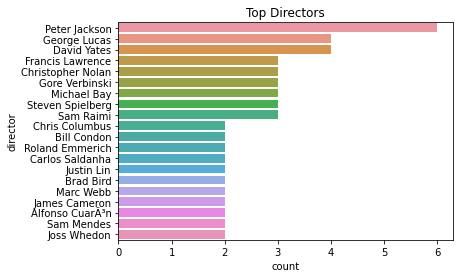

In [49]:
plt.title("Top Directors")
sns.barplot(x = 'count' , y = 'director',data = dir_df);

And so, **Peter Jackson's** the man you need. 

<a  id = 'top genre'> </a>
### Top Genre?

In [50]:
df1 = df.copy()
df2 = df.copy()

Made copies of the **df** dataset.

In [51]:
genres = df1.genres.str.split('|',expand = True)
genres = pd.melt(genres)['value'].value_counts()
genres = genres.reset_index()
genres = genres.rename(columns = {x: x.replace('index','genres') for x in genres.columns})
genres

,genres,value
0,Drama,2781
1,Comedy,2112
2,Thriller,1826
3,Action,1570
4,Romance,1052
5,Adventure,987
6,Crime,935
7,Horror,836
8,Science Fiction,756
9,Family,598


First, i have split the __genre__ column and set the expand arg to true , which returns a new dataframe with split items in columns and then the value_counts() counts the apperance of each unique value. Then, the pd.melt() merges the returned dataframe into a single column or series.Lastly, i reset the index and renamed the columns.

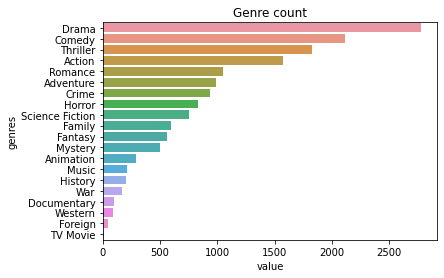

In [52]:
plt.title('Genre count')
sns.barplot(x = genres.value,y = genres.genres, data = genres);

For easy grasp, the count of each genre has been plotted on a barchart. Drama has the most entries and Tv Movies the least.

In [53]:
df2['genres'] = df2.genres.str.split('|')
df2 = df2.explode('genres')
gen_rev_bud= df2.groupby('genres')[['budget','revenue']]
gen_rev_bud_sum = gen_rev_bud.sum()

On the second copy of the df dataframe, I have performed a split and then exploded the result, grouped by the genres column and then sliced the budget and revenue columns. I have also performed some aggregations on the result.

Text(0.5, 1.0, 'Sum of Budget and Revenue for each Genre')

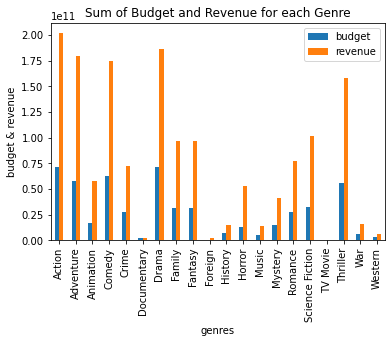

In [54]:
gen_rev_bud_sum.plot(kind = 'bar')
plt.ylabel('budget & revenue')
plt.title('Sum of Budget and Revenue for each Genre')

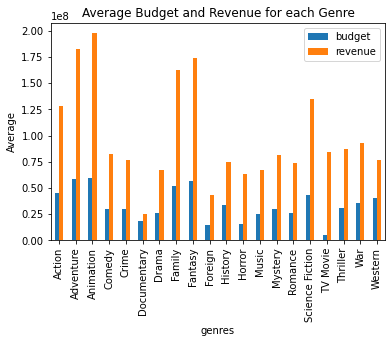

In [55]:
gen_rev_bud_mean = gen_rev_bud.mean()
gen_rev_bud_mean.plot(kind = 'bar')
plt.ylabel('Average')
plt.title('Average Budget and Revenue for each Genre');

<a id = "conclusions"></a>
### Conclusions

### Limitations:
* Quite a number of entries for the were missing or incorrectly entered,
    and so, i have had to make some estimations.

#### Findings:
* More than half the time, a high budget does not translate to a high revenue.
* The length of the runtime does not influence the budget.
* There has been a steady rise in profitability in the indursy and it is a viable option for investment.
* Peter Jackson is the top director with the most entries in the top 100 most profitable movies.

In [56]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

[NbConvertApp] WARNING | pattern 'Investigate_a_Dataset.ipynb' matched no files


This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answer_yes=True]
--execute
    Execute the notebook prior to export.
    Equivalent to: [--ExecutePr

255

<li> <a href = "#top"> Back to the top</a></li>